In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), adaptive = false, dt = 0.001)

U0 = 0.268371462842221 # 0.265;
I0 = -1.75061296075842 # -1.7064049

Homoclinic destroyed

U0 = 0.2665
I0 = -1.7266
I0 =  -1.7265152 более точная граница

In [950]:
U0 = 0.26653434130262693
I0 =  -1.726681764534841
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = SA[8.3350, 0.7384, 0.4382]
println("last point  pink trajectory:$u0_1")

last point  pink trajectory:[8.335, 0.7384, 0.4382]


In [951]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26653434130262693, 0.305, 0.3, -1.726681764534841]
 time:          0.0
 state:         [8.335, 0.7384, 0.4382]


In [952]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [953]:
ei

3-element Vector{Vector{ComplexF64}}:
 [-7.371186280874289 + 0.0im, -0.30303030240464096 + 0.0im, -0.26114127610535887 + 0.0im]
 [-7.533842946673348 + 0.0im, -0.3030303029826589 + 0.0im, 0.25471344353427 + 0.0im]
 [-6.431307438890623 + 0.0im, 2.2927003934803665 - 13.729357136549142im, 2.2927003934803665 + 13.729357136549142im]

In [963]:
fp[2]

3-element SVector{3, Float64} with indices SOneTo(3):
 1.7258777423977758
 0.9269190819539939
 0.9620427312126272

In [959]:
idx = 2
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-4 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 1.7257781348602106
 0.9269279305618605
 0.9620425297206278

In [960]:
prob_for = ODEProblem(TM, shift, (0.0, 1000), p)
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001);

SA[3.461748172485322, 0.8912634929397303, 0.9582217985450167]

In [961]:
GLMakie.activate!()
ts_for, tf_for = 1, length(sol_for)

f = Figure(resolution = (700, 700))
ax = LScene(f[1, 1], show_axis = true)

scale!(ax.scene, 50, 50, 1)

lines!(sol_for[3,ts_for:tf_for], sol_for[2,ts_for:tf_for], sol_for[1,ts_for:tf_for],
    linewidth = 1.0, color = :deeppink)



for (i, ep) in enumerate(fp)
    scatter!(ep[3], ep[2], ep[1], color = colors[i], markersize = 10)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)

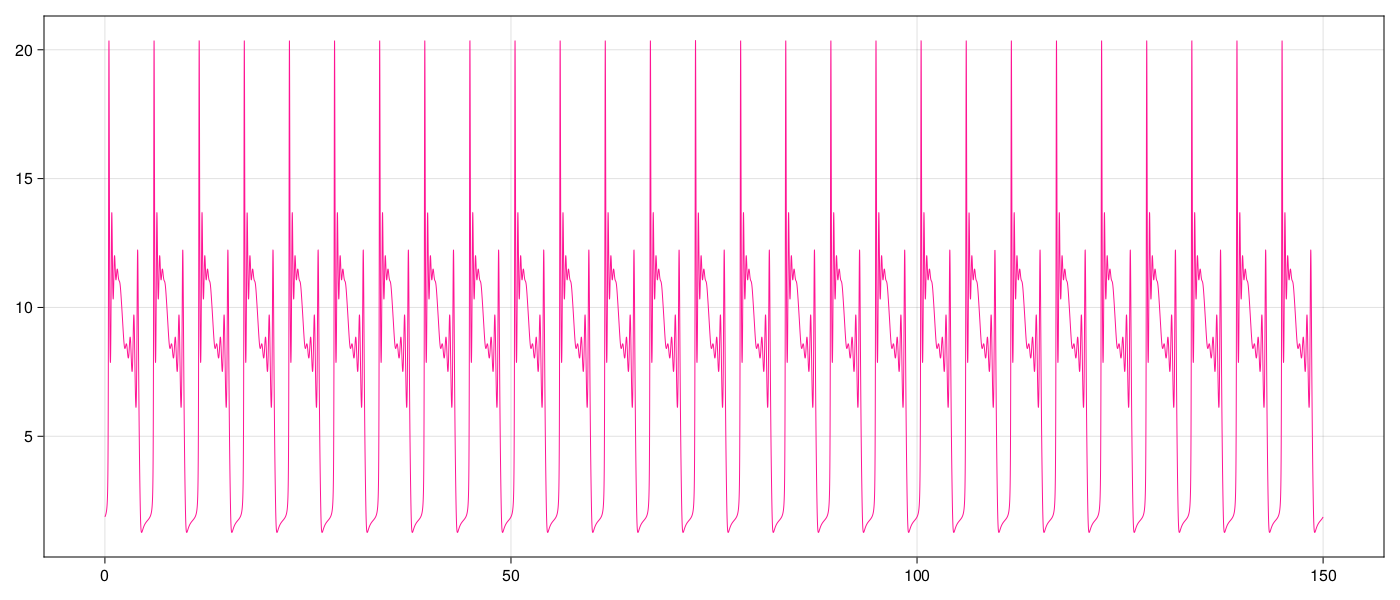

CairoMakie.Screen{IMAGE}


In [939]:
CairoMakie.activate!()
ts_for, tf_for = 1, 150000

f = Figure(resolution = (1400, 600))
ax = Axis(f[1, 1])

lines!(sol_for.t[ts_for:tf_for], sol_for[1,ts_for:tf_for],
    linewidth = 1.0, color = :deeppink)

display(f)

In [17]:
colors = ["orange", "black", "blue"];